# Embeddings
Establishing similarity between texts using vector embeddings and cosine similarity (a metric)
There are other metrics such as L2 distance (Euclidean distance)

## Cosine Distance
Cosine similarity uses the cosine of the angle between two sets of vectors to measure how similar they are.

In [26]:
import numpy as np
from numpy.linalg import norm

def cosine_similarity(vec_1: list[float], vec_2: list[float]) -> float:
    return np.dot(vec_1,vec_2)/(norm(vec_1)*norm(vec_2))

## L2 Distance (Euclidean distance)
Shortest distance between points regardless of dimensions.

In [27]:
def l2_distance(vec_1: list[float], vec_2: list[float]) -> float:
    return norm(np.array(vec_1) - np.array(vec_2))

In [28]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings
import seaborn as sns
import matplotlib.pyplot as plt

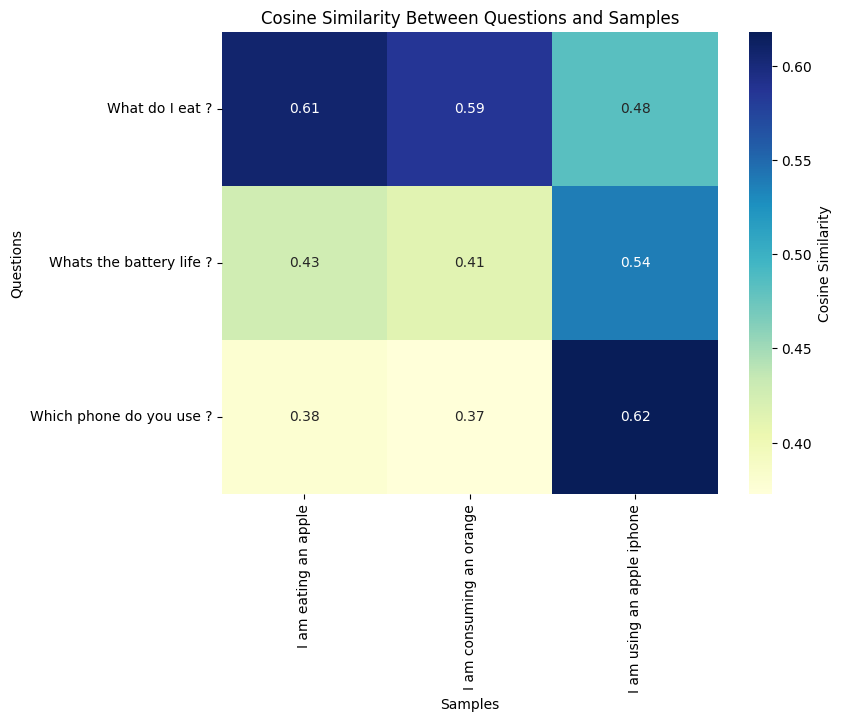

In [29]:
model_name = "BAAI/bge-large-en-v1.5"
embedding_model = HuggingFaceEmbeddings(
    model_name=model_name,
)

questions = [
    "What do I eat ?",
    "Whats the battery life ?",
    "Which phone do you use ?"
]
sample = [
    "I am eating an apple",
    "I am consuming an orange",
    "I am using an apple iphone"
]

questions_map = {q:embedding_model.embed_query(q) for q in questions}
sample_map = {s:embedding_model.embed_query(s) for s in sample}

cosine_matrix = []
l2_matrix = []

for q_text, q_embed in questions_map.items():
    row = []
    l2_row = []
    for s_text, s_embed in sample_map.items():
        cosine = cosine_similarity(q_embed, s_embed)
        l2 = l2_distance(q_embed, s_embed)
        row.append(cosine)
        l2_row.append(l2)
    cosine_matrix.append(row)
    l2_matrix.append(l2_row)

# Convert lists to numpy array for better handling
cosine_matrix = np.array(cosine_matrix)

# Plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    cosine_matrix, 
    annot=True, 
    cmap="YlGnBu", 
    xticklabels=sample_map.keys(), 
    yticklabels=questions_map.keys(),
    cbar_kws={'label': 'Cosine Similarity'}
)

# Add titles and labels
plt.title("Cosine Similarity Between Questions and Samples")
plt.xlabel("Samples")
plt.ylabel("Questions")
plt.show()

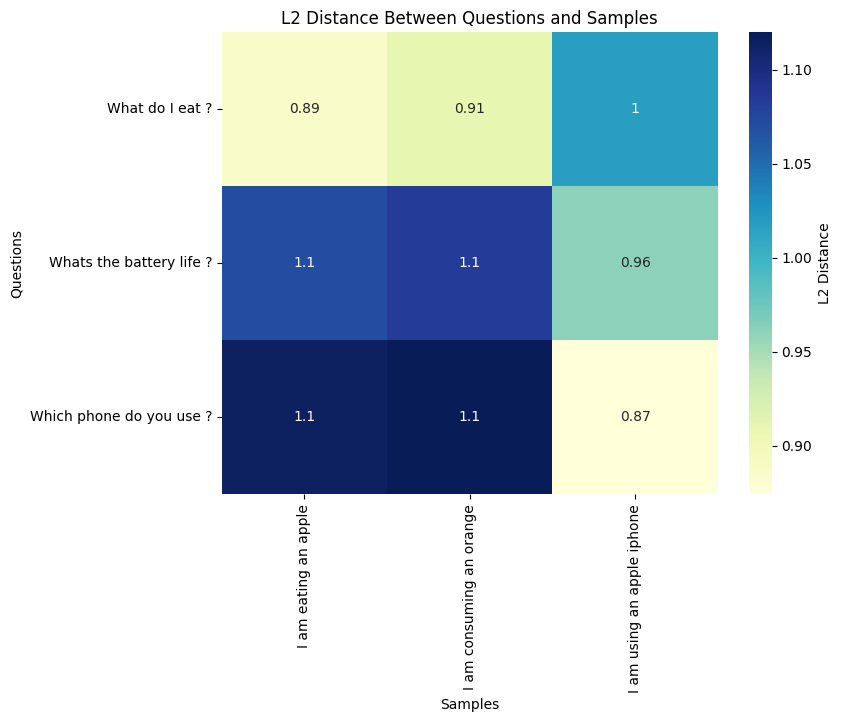

In [30]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    l2_matrix, 
    annot=True, 
    cmap="YlGnBu", 
    xticklabels=sample_map.keys(), 
    yticklabels=questions_map.keys(),
    cbar_kws={'label': 'L2 Distance'}
)

# Add titles and labels
plt.title("L2 Distance Between Questions and Samples")
plt.xlabel("Samples")
plt.ylabel("Questions")
plt.show()